## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
    
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)
    else:
        im_num = int(fname.split('.')[0][-1])
        if im_num == 5:
            ret, corners = cv2.findChessboardCorners(gray, (7,5), None)
            objp = np.zeros((5*7,3), np.float32)
            objp[:,:2] = np.mgrid[0:5,0:7].T.reshape(-1,2)
        elif im_num == 4:
            ret, corners = cv2.findChessboardCorners(gray, (6,5), None)
            objp = np.zeros((5*6,3), np.float32)
            objp[:,:2] = np.mgrid[0:6,0:5].T.reshape(-1,2)
        elif im_num == 1:
            ret, corners = cv2.findChessboardCorners(gray, (9,5), None)
            objp = np.zeros((5*9,3), np.float32)
            objp[:,:2] = np.mgrid[0:9,0:5].T.reshape(-1,2)
        assert ret
        objpoints.append(objp)
        imgpoints.append(corners)
# cv2.destroyAllWindows()

In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.T.shape, None, None)#, flags = cv2.CALIB_USE_INTRINSIC_GUESS)

In [10]:
img = cv2.imread(images[10])
dst = cv2.undistort(img, mtx, dist, None, mtx)

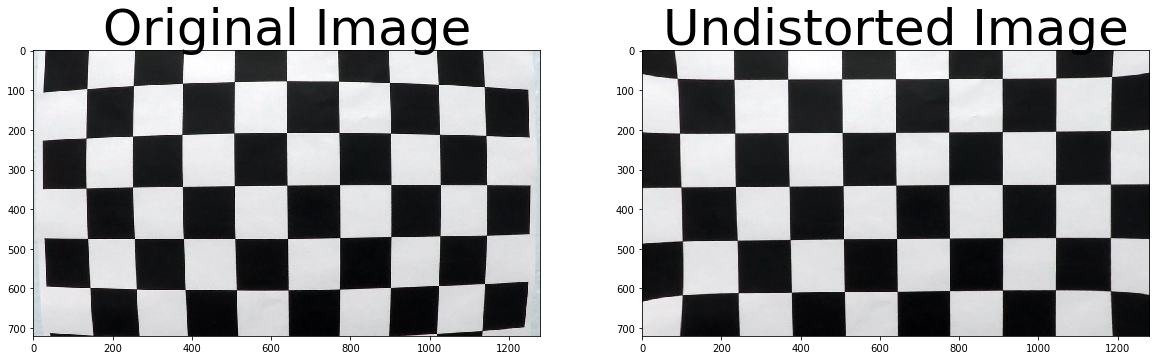

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 30))
# f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize = 50)

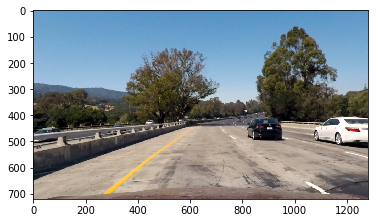

In [102]:
im_num = 1
distorted = plt.imread('test_images/test' + str(im_num) + '.jpg')
img = cv2.undistort(distorted, mtx, dist, None, mtx)
plt.imshow(img)

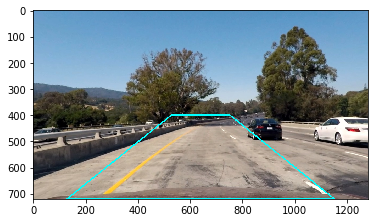

In [103]:
# Masking

height, width = saturation.shape
offset = (width - height)/5
bottom_left = (width/10, height)
top_left = (width/2 - offset, height/1.8)
top_right = (width/2 + offset, height/1.8)
bottom_right = (width - width/10, height)
vertices = np.array([[top_left, bottom_left, bottom_right, top_right]], np.int32)
poly_pts = vertices.reshape((-1, 1, 2))
poly = np.copy(img)
poly = cv2.polylines(poly, [poly_pts], True, (0, 255, 255), thickness = 3)
plt.imshow(poly)

In [104]:
# Region of Interest

# def roi(img, vertices):
    
#     mask = np.zeros_like(img)
    
#     if len(img.shape) > 2:
#         channel_count = img.shape[2]
#         ignore_mask_color = (255,) * channel_count
#     else:
#         ignore_mask_color = 255
        
#     cv2.fillPoly(mask, vertices, ignore_mask_color)
#     masked_img = cv2.bitwise_and(img, mask)
    
#     return masked_img

# masked = roi(img, vertices)

# plt.imshow(masked)

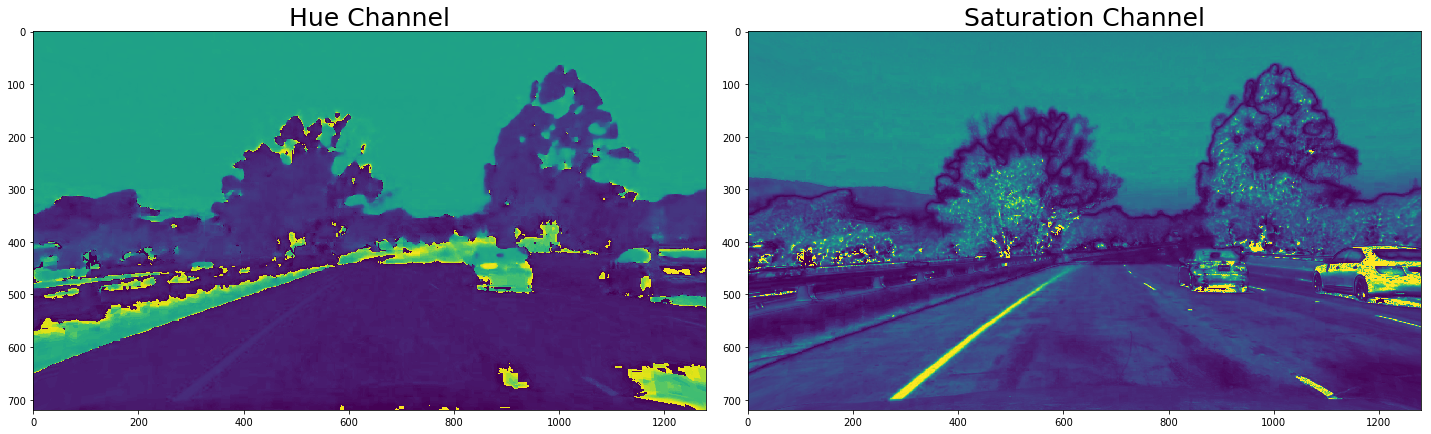

In [105]:
# Color Schemes
which = np.copy(img) #or masked

hls = cv2.cvtColor(which, cv2.COLOR_RGB2HLS)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 30))
f.tight_layout()
hue = hls[:,:,0]
saturation = hls[:,:,2]
ax1.imshow(hue)
ax1.set_title('Hue Channel', fontsize = 25)
ax2.imshow(saturation)
ax2.set_title('Saturation Channel', fontsize = 25)

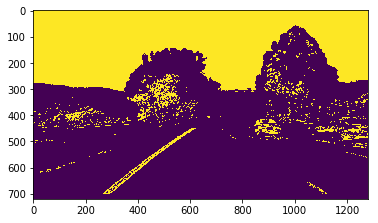

In [106]:
test_binary = np.zeros_like(saturation)
test_binary[(saturation > 100) & (saturation < 255)] = 1
plt.imshow(test_binary)

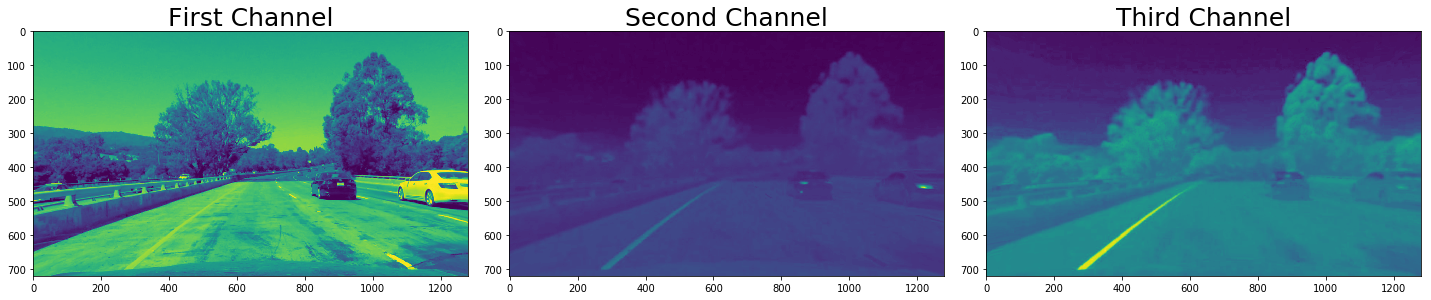

In [107]:
# Color Schemes
which2 = np.copy(img) #or masked

hls = cv2.cvtColor(which2, cv2.COLOR_RGB2Luv)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 30))
f.tight_layout()
axis1 = hls[:,:,0]
axis2 = hls[:,:,1]
axis3 = hls[:,:,2]
ax1.imshow(axis1)
ax1.set_title('First Channel', fontsize = 25)
ax2.imshow(axis2)
ax2.set_title('Second Channel', fontsize = 25)
ax3.imshow(axis3)
ax3.set_title('Third Channel', fontsize = 25)

In [108]:
crop = axis1[450:550,700:820]
unique, counts = np.unique(crop, return_counts = True)
dict(zip(counts, unique))

{1: 240,
 2: 245,
 3: 246,
 4: 230,
 5: 252,
 6: 249,
 7: 238,
 8: 253,
 12: 251,
 13: 250,
 14: 145,
 15: 206,
 16: 142,
 17: 205,
 18: 143,
 19: 146,
 21: 149,
 22: 152,
 25: 153,
 28: 155,
 30: 156,
 31: 151,
 34: 204,
 35: 157,
 37: 154,
 47: 158,
 55: 159,
 56: 163,
 60: 161,
 61: 202,
 62: 162,
 66: 203,
 75: 164,
 80: 165,
 86: 201,
 96: 166,
 113: 199,
 120: 189,
 127: 198,
 129: 167,
 131: 191,
 136: 200,
 140: 196,
 143: 188,
 148: 197,
 149: 186,
 152: 187,
 162: 190,
 165: 192,
 166: 195,
 169: 193,
 175: 185,
 186: 194,
 207: 184,
 227: 168,
 295: 183,
 315: 170,
 322: 169,
 383: 182,
 450: 171,
 467: 181,
 503: 180,
 508: 172,
 556: 177,
 558: 176,
 564: 178,
 589: 175,
 655: 179,
 678: 173,
 683: 174}

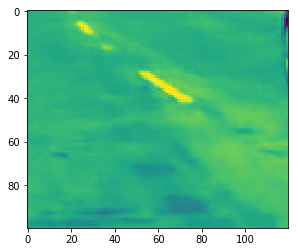

In [109]:
plt.imshow(axis1[450:550,700:820])

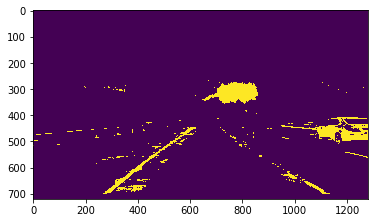

In [110]:
binary = np.zeros_like(axis1)
binary[(axis1 > 200) & (axis1 < 255)] = 1
plt.imshow(binary)

In [111]:
# Saturation thresholding

def color_thresh(img, thresh = (0, 255)):

    img = cv2.GaussianBlur(img, (3,3), 0)
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    sat = hls[:,:,2]
    luv = cv2.cvtColor(img, cv2.COLOR_RGB2Luv)
    l = luv[:,:,0]
    binary_output = np.zeros_like(sat)

    binary_output[((sat > 100) & (sat < thresh[1]))|(l > 200) & (l < thresh[1])] = 1
    kernel = np.ones((3,3), np.uint8)
    dilation = cv2.dilate(binary_output,kernel,iterations = 1)
    
    return binary_output

# Hue thresholding

def hue_thresh(img, thresh = (0, 255)):

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hue = hls[:,:,0]
    binary_output = np.zeros_like(hue)

    binary_output[(hue > thresh[0]) & (hue < thresh[1])] = 1
    
    return binary_output

# Derivative thresholding

def abs_sobel_thresh(img, orient='x', ksize = 3, thresh = (0, 255)):
    
    assert ksize % 2 == 1
#   Using gray images to identify white lines better
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     sat = hls[:,:,2]
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = ksize)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = ksize)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1
    return binary_output

def mag_thresh(img, ksize = 3, thresh = (0, 255)):
    
    assert ksize % 2 == 1
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    sat = hls[:,:,2]
    sobelx = cv2.Sobel(sat, cv2.CV_64F, 1, 0, ksize = ksize)
    sobely = cv2.Sobel(sat, cv2.CV_64F, 0, 1, ksize = ksize)
#   scaling magnitude of y because it introduces noise
    abs_sobelxy = np.sqrt(sobelx**2 + 0.3 * sobely**2)
    scaled = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    binary_output = np.zeros_like(scaled)
    binary_output[(scaled > thresh[0]) & (scaled < thresh[1])] = 1
    
    return binary_output

def dir_thresh(img, ksize = 3, thresh = (0, np.pi/2)):

    assert ksize % 2 == 1
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     sat = hls[:,:,2]
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = ksize)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = ksize)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    grad = np.arctan2(abs_sobely, abs_sobelx)
    binary_output = np.zeros_like(gray)
    binary_output[(grad > thresh[0]) & (grad < thresh[1])] = 1
#   cv2 morphological transform
    kernel = np.ones((5,5), np.uint8)
    binary_output = cv2.morphologyEx(binary_output, cv2.MORPH_OPEN, kernel)
    
    return binary_output

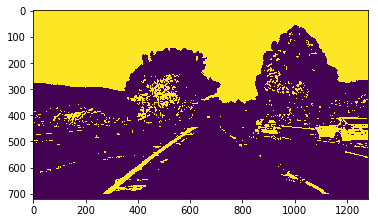

In [112]:
plt.imshow(color_thresh(img))

In [113]:
# I will use mag_binary and dir_binary probably

gradx = abs_sobel_thresh(which, orient = 'x', ksize = 9, thresh = (20, 100))
grady = abs_sobel_thresh(which, orient = 'y', ksize = 9, thresh = (20, 100))
mag_binary = mag_thresh(which, ksize = 9, thresh = (30, 100))
dir_binary = dir_thresh(which, ksize = 13, thresh = (0.8, 1.2))
sat_binary = color_thresh(which)
hue_binary = hue_thresh(which, thresh = (10, 60))

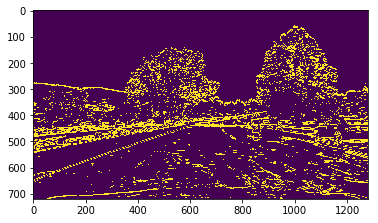

In [114]:
plt.imshow(grady)

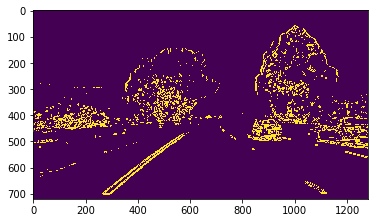

In [115]:
plt.imshow(mag_binary)

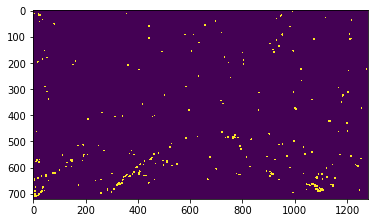

In [116]:
plt.imshow(dir_binary)

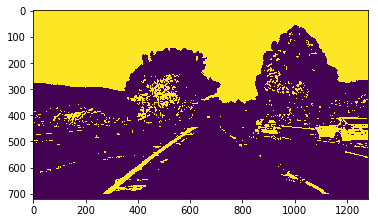

In [117]:
plt.imshow(sat_binary)

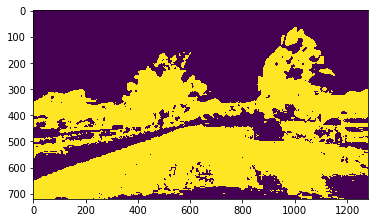

In [118]:
plt.imshow(hue_binary)

In [119]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | (((dir_binary == 1) | (mag_binary == 1)) & ((sat_binary == 1) | (mag_binary == 1)))] = 1

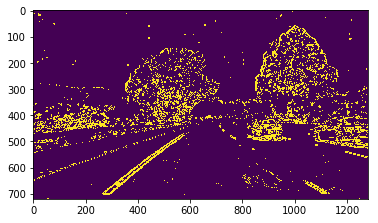

In [123]:
plt.imshow(combined)

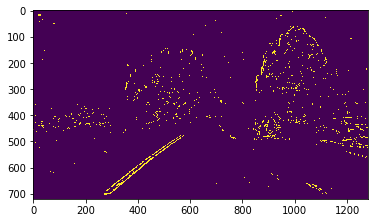

In [124]:
ker = np.ones((3,3), np.uint8)
plt.imshow(cv2.erode(combined, ker, iterations = 1))

In [85]:
def reinforce(img, kernel = (3,3)):
    blur = cv2.GaussianBlur(img, (7,7), 0)
    kernel = np.ones(kernel, np.uint8)
    dilation = cv2.dilate(blur,kernel,iterations = 1)
    return dilation

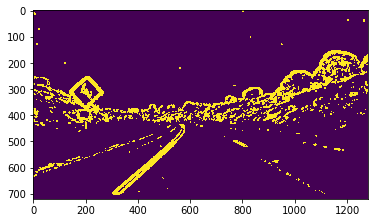

In [86]:
dilated = reinforce(combined)
plt.imshow(dilated)

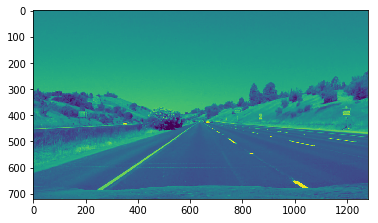

In [126]:
# Perspective transform

straight = plt.imread('test_images/straight_lines1.jpg')
straight_gray = cv2.cvtColor(straight, cv2.COLOR_RGB2GRAY)
plt.imshow(straight_gray)

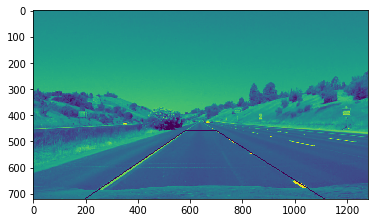

In [127]:
trap_pts = np.array([[197,720], [580, 460], [702, 460], [1115, 720]], np.int32)
trap = np.copy(straight_gray)
trap = cv2.polylines(trap, [trap_pts], True, (0, 255, 0), thickness = 2)
plt.imshow(trap)

In [128]:
src_pts = np.float32(trap_pts)
dest_pts = np.array([[350, 720], [350, 0], [970, 0], [970, 720]], np.float32)

In [129]:
M = cv2.getPerspectiveTransform(src_pts, dest_pts)
Minv = cv2.getPerspectiveTransform(dest_pts, src_pts)
warped = cv2.warpPerspective(trap, M, (1280, 720), flags = cv2.INTER_LINEAR)

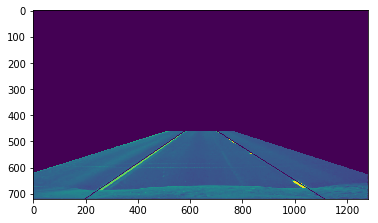

In [132]:
plt.imshow(cv2.warpPerspective(warped, Minv, (1280, 720), flags = cv2.INTER_LINEAR))

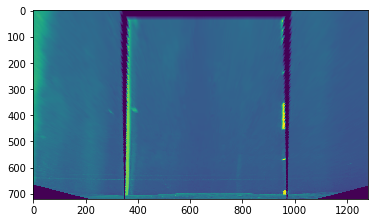

In [1108]:
plt.imshow(warped)

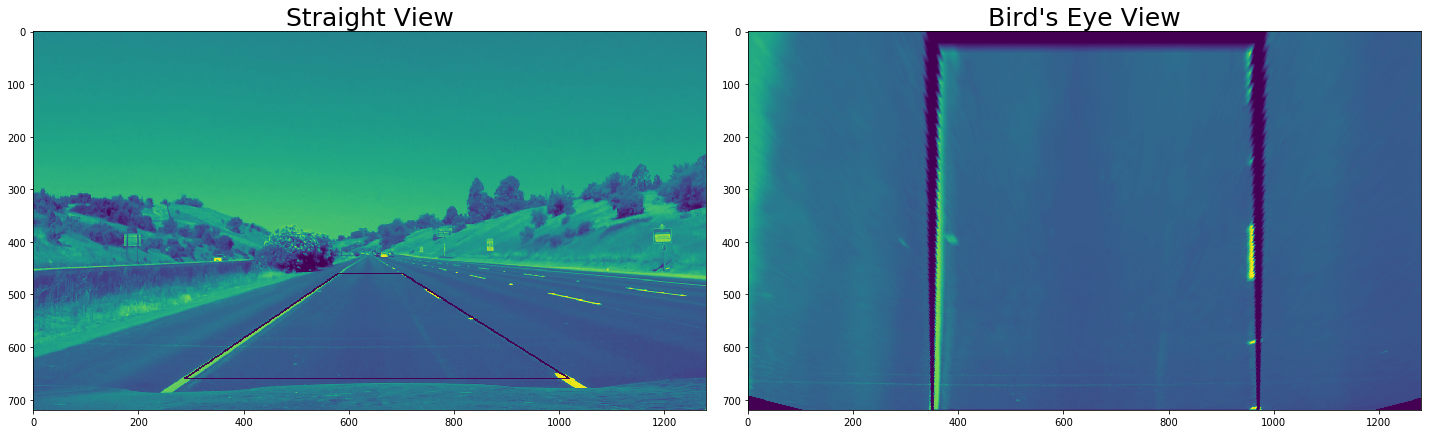

In [1096]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 30))
f.tight_layout()
ax1.imshow(trap)
ax1.set_title("Straight View", fontsize = 25)
ax2.imshow(warped)
ax2.set_title("Bird's Eye View", fontsize = 25)

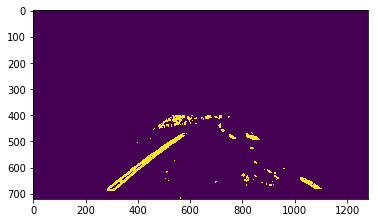

In [1097]:
# Region of Interest

def roi(img, vertices):
    
    mask = np.zeros_like(img)
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    
    return masked_img

masked = roi(dilated, vertices)

plt.imshow(masked)

In [1100]:
warped_curve = cv2.warpPerspective(masked, M, (1280, 720), flags = cv2.INTER_LINEAR)

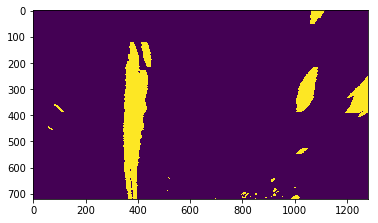

In [1101]:
# My lanes are in the upper half

plt.imshow(warped_curve)

In [963]:
binary_warped = np.copy(warped_curve)

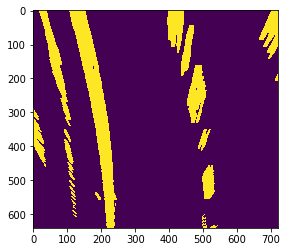

In [964]:
plt.imshow(binary_warped[:binary_warped.shape[0]//2,:])

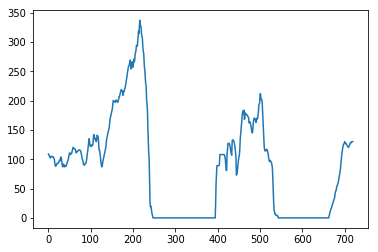

In [965]:
histogram = np.sum(binary_warped[:binary_warped.shape[0]//2,:], axis=0)
plt.plot(histogram)

In [969]:
# Fitting a polynomial

out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

nwindows = 11
window_height = np.int(binary_warped.shape[0]/nwindows)
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
leftx_current = leftx_base
rightx_current = rightx_base
margin = 100
minpix = 50
left_lane_inds = []
right_lane_inds = []

for window in range(nwindows):
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

(720, 0)

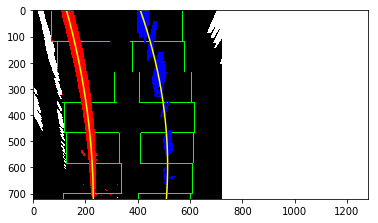

In [970]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)